# ✅ **Linear Regression** ✅

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# **Load Data into the Data Frame**

In [8]:
# Path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/yahoo_data.csv'

# Read the CSV file into a DataFrame
dataset = pd.read_csv(file_path)

# Display the first few rows of the DataFrame and format the date column
dataset.head().style.format({'Date': lambda x: pd.to_datetime(x).strftime('%Y-%m-%d')})

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-28,"33,797.43","34,104.56","33,728.40","34,098.16","34,098.16","354,310,000"
1,2023-04-27,"33,381.66","33,859.75","33,374.65","33,826.16","33,826.16","343,240,000"
2,2023-04-26,"33,596.34","33,645.83","33,235.85","33,301.87","33,301.87","321,170,000"
3,2023-04-25,"33,828.34","33,875.49","33,525.39","33,530.83","33,530.83","297,880,000"
4,2023-04-24,"33,805.04","33,891.15","33,726.09","33,875.40","33,875.40","252,020,000"


# **Data Preprocessing**

In [9]:
import pandas as pd
import numpy as np

# Assuming 'df' is the DataFrame containing your dataset

# Convert 'Date' column to datetime type
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Remove commas and convert columns to numeric type
dataset['Open'] = dataset['Open'].replace(',', '', regex=True).astype(float)
dataset['High'] = dataset['High'].replace(',', '', regex=True).astype(float)
dataset['Low'] = dataset['Low'].replace(',', '', regex=True).astype(float)
dataset['Close'] = dataset['Close'].replace(',', '', regex=True).astype(float)
dataset['Adj Close'] = dataset['Adj Close'].replace(',', '', regex=True).astype(float)
dataset['Volume'] = dataset['Volume'].replace(',', '', regex=True).astype(int)

# Calculate the new columns based on the modified dataset
dataset['Open_Close'] = (dataset['Open'] - dataset['Adj Close']) / dataset['Open']
dataset['High_Low'] = (dataset['High'] - dataset['Low']) / dataset['Low']
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'], 1, 0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'], 1, 0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'], 1, 0)
dataset['Returns'] = dataset['Adj Close'].pct_change()

# Drop rows with NaN values
dataset = dataset.dropna()

# Display the modified dataset
print(dataset.head())


        Date      Open      High       Low     Close  Adj Close     Volume  \
1 2023-04-27  33381.66  33859.75  33374.65  33826.16   33826.16  343240000   
2 2023-04-26  33596.34  33645.83  33235.85  33301.87   33301.87  321170000   
3 2023-04-25  33828.34  33875.49  33525.39  33530.83   33530.83  297880000   
4 2023-04-24  33805.04  33891.15  33726.09  33875.40   33875.40  252020000   
5 2023-04-21  33793.60  33858.83  33688.57  33808.96   33808.96  291080000   

   Open_Close  High_Low  Increase_Decrease  Buy_Sell_on_Open  Buy_Sell  \
1   -0.013316  0.014535                  0                 1         0   
2    0.008765  0.012335                  0                 1         1   
3    0.008795  0.010443                  0                 0         1   
4   -0.002081  0.004894                  1                 0         0   
5   -0.000455  0.005054                  1                 0         0   

    Returns  
1 -0.007977  
2 -0.015500  
3  0.006875  
4  0.010276  
5 -0.001961  


In [10]:
#View Dataset
dataset

,Date,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000,-0.013316,0.014535,0,1,0,-0.007977
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,0.008765,0.012335,0,1,1,-0.015500
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,0.008795,0.010443,0,0,1,0.006875
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,-0.002081,0.004894,1,0,0,0.010276
5,2023-04-21,33793.60,33858.83,33688.57,33808.96,33808.96,291080000,-0.000455,0.005054,1,0,0,-0.001961
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,-0.001631,0.008904,1,0,0,-0.000119
1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,-0.016647,0.023318,1,0,0,-0.003892
1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,-0.003940,0.019754,0,1,0,-0.013699
1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,0.007165,0.012527,0,1,1,-0.000216


# **Dataset Cleaning and Null Value Testing**

In [11]:
# See how many null values in each column

dataset.isnull().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Open_Close           0
High_Low             0
Increase_Decrease    0
Buy_Sell_on_Open     0
Buy_Sell             0
Returns              0
dtype: int64

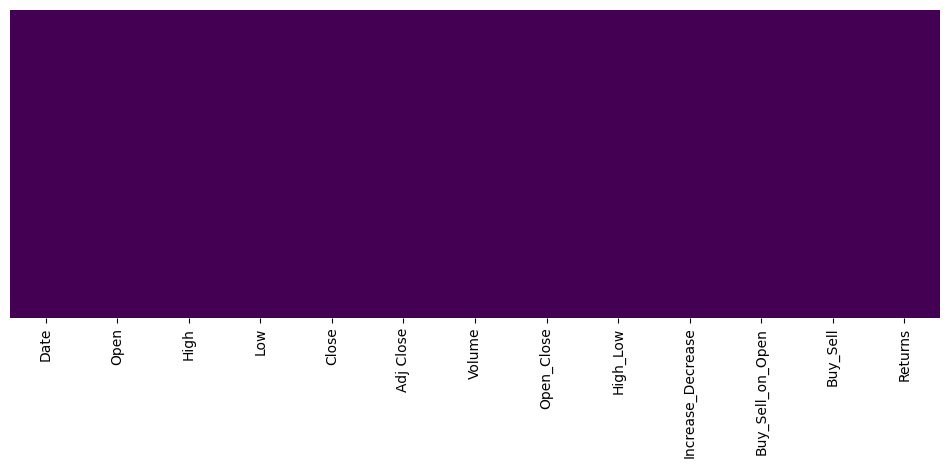

In [12]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

# **Analyze the Dataset**

In [13]:
# view number of rows, number of columns
dataset.shape

(1257, 13)

In [14]:
# total number of records
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  16341


In [15]:
# view columns names
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Open_Close', 'High_Low', 'Increase_Decrease', 'Buy_Sell_on_Open',
       'Buy_Sell', 'Returns'],
      dtype='object')

In [16]:
# view data types of the columns
dataset.dtypes

Date                 datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Adj Close                   float64
Volume                        int64
Open_Close                  float64
High_Low                    float64
Increase_Decrease             int64
Buy_Sell_on_Open              int64
Buy_Sell                      int64
Returns                     float64
dtype: object

In [17]:
# view dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 1 to 1257
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1257 non-null   datetime64[ns]
 1   Open               1257 non-null   float64       
 2   High               1257 non-null   float64       
 3   Low                1257 non-null   float64       
 4   Close              1257 non-null   float64       
 5   Adj Close          1257 non-null   float64       
 6   Volume             1257 non-null   int64         
 7   Open_Close         1257 non-null   float64       
 8   High_Low           1257 non-null   float64       
 9   Increase_Decrease  1257 non-null   int64         
 10  Buy_Sell_on_Open   1257 non-null   int64         
 11  Buy_Sell           1257 non-null   int64         
 12  Returns            1257 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(4)
memory usage: 137.5 KB


In [18]:
# view the statistics per each column
dataset.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
count,1257,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,2020-10-27 16:14:53.556086016,29592.480477,29773.502928,29398.990724,29595.782681,29595.782681,3.450563e+08,-0.000157,0.013052,0.510740,0.451074,0.456643,-0.000184
min,2018-05-01 00:00:00,19028.360000,19121.010000,18213.650000,18591.930000,18591.930000,8.615000e+07,-0.055147,0.002525,0.000000,0.000000,0.000000,-0.102052
25%,2019-07-31 00:00:00,26040.300000,26162.280000,25877.240000,26026.320000,26026.320000,2.772300e+08,-0.005230,0.007149,0.000000,0.000000,0.000000,-0.006289
50%,2020-10-27 00:00:00,29198.920000,29330.160000,28995.660000,29196.040000,29196.040000,3.245800e+08,-0.000522,0.010461,1.000000,0.000000,0.000000,-0.000725
75%,2022-01-26 00:00:00,33596.340000,33817.960000,33343.430000,33597.920000,33597.920000,3.876100e+08,0.004157,0.015958,1.000000,1.000000,1.000000,0.004709
max,2023-04-27 00:00:00,36722.600000,36952.650000,36636.000000,36799.650000,36799.650000,9.159900e+08,0.053284,0.089469,1.000000,1.000000,1.000000,0.148456
std,NaN,4005.917425,4008.742338,4004.681746,4007.052034,4007.052034,1.069564e+08,0.009942,0.009684,0.500084,0.497799,0.498315,0.013664


array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Open_Close'}>],
       [<Axes: title={'center': 'High_Low'}>,
        <Axes: title={'center': 'Increase_Decrease'}>,
        <Axes: title={'center': 'Buy_Sell_on_Open'}>,
        <Axes: title={'center': 'Buy_Sell'}>],
       [<Axes: title={'center': 'Returns'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

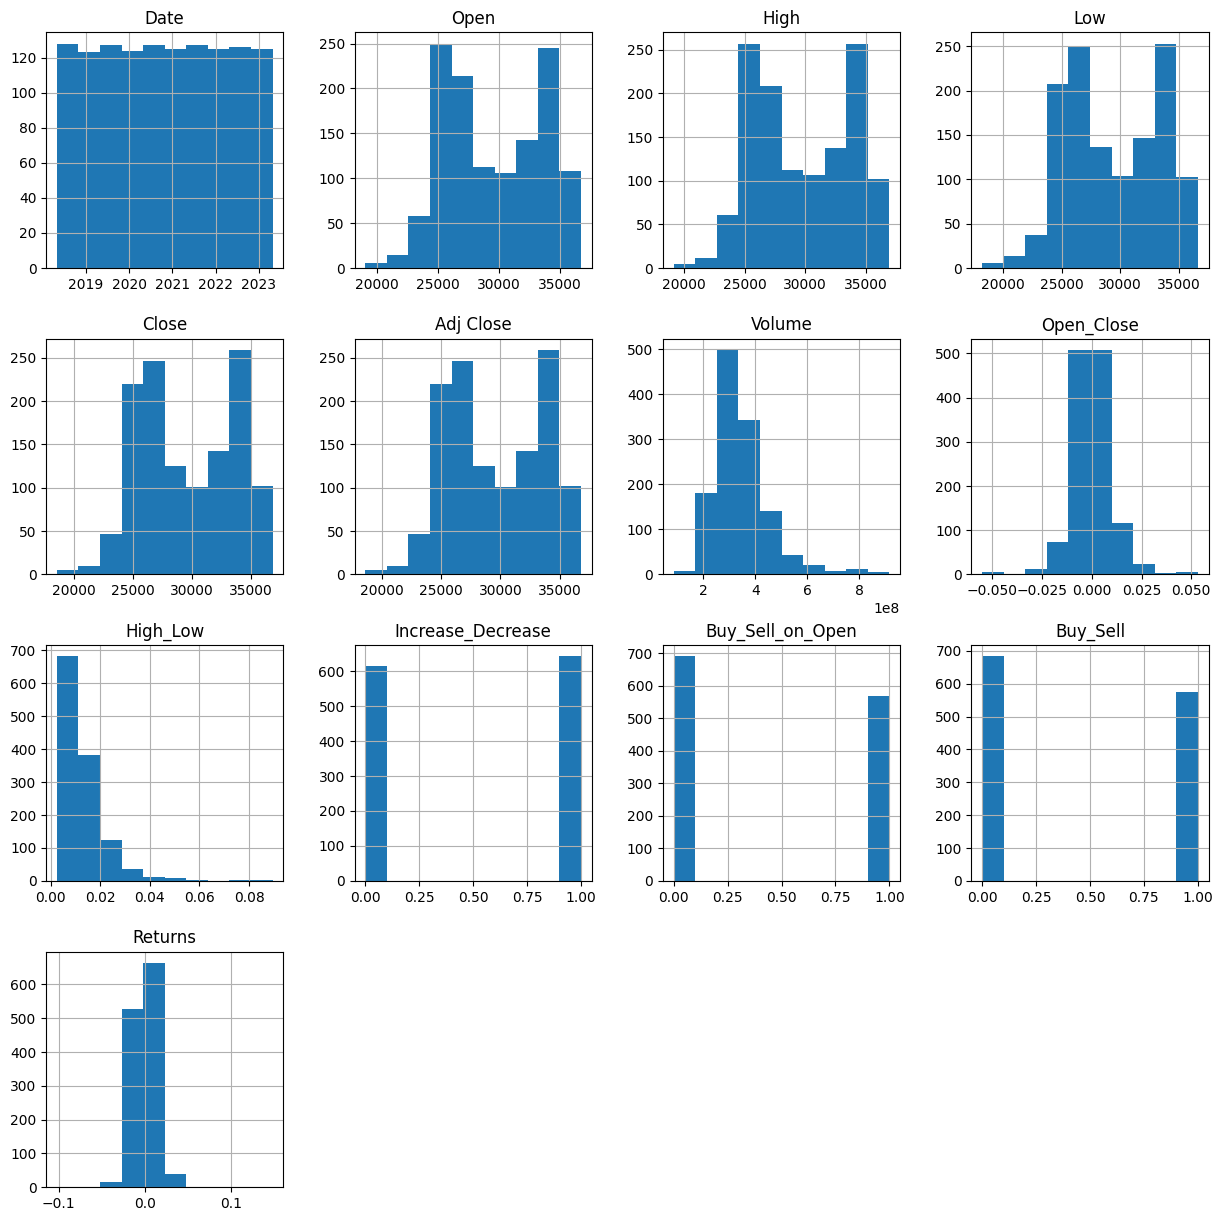

In [19]:
# view the histogram per each numerical column
dataset.hist(figsize=(15, 15))

<Axes: xlabel='Adj Close', ylabel='Density'>

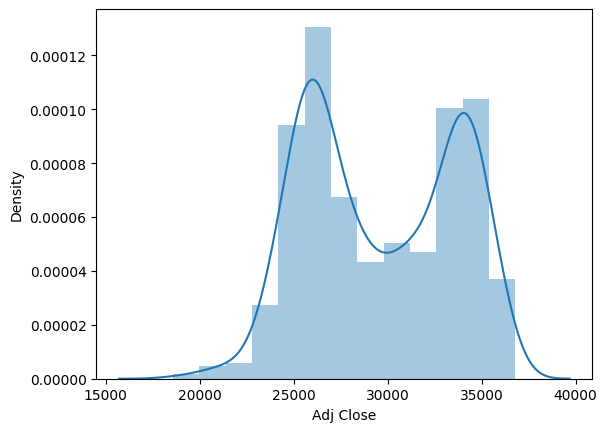

In [20]:
sns.distplot(dataset['Adj Close'])

<Axes: >

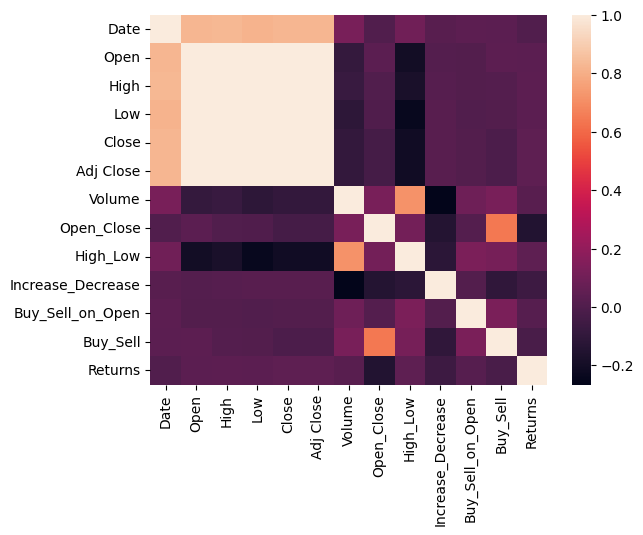

In [21]:
sns.heatmap(dataset.corr())

# **Define X and Y**

In [22]:
X = dataset[['Open', 'High', 'Low','Volume', 'Open_Close', 'High_Low', 'Returns']]
y = dataset['Adj Close']

# **Split Train Dataset and Test Dataset**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.4, random_state=101)

# **Dataset Traning and Model Traning**

In [24]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [25]:
print(lm.intercept_)

-27.29076441367215


In [29]:
# Assuming lm.coef_ is an array of coefficients and X_train.columns is the list of feature names
coeff_df = pd.DataFrame(lm.coef_, columns=['Coefficient'], index=X_train.columns)
coeff_df

,Coefficient
Open,8.242218e-01
High,6.322761e-02
Low,1.132853e-01
Volume,2.029703e-08
Open_Close,-2.576922e+04
High_Low,7.762175e+02
Returns,-3.700579e+02


# **Comparison of Actual Values and Predicted Values**

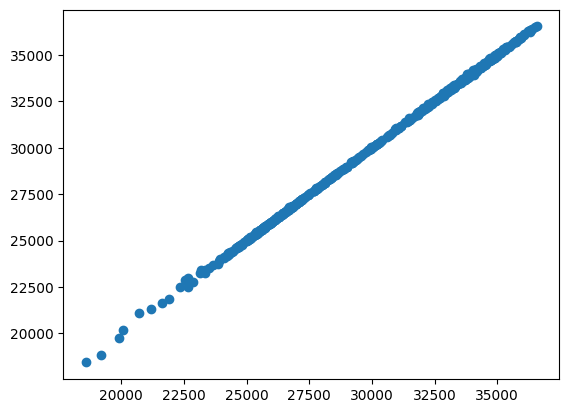

In [30]:
y_pred = lm.predict(X_test)
plt.scatter(y_test,y_pred)
plt.savefig("Figure: Comparison of Actual Values and Predictions Values")

In [31]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(df.head())
print(df.tail())

        Actual     Predicted
1025  26218.13  26214.107697
1042  25650.88  25699.515051
211   31438.26  31441.567756
1157  26743.50  26746.146514
1     33826.16  33772.665984
       Actual     Predicted
510  33821.30  33849.930692
188  32845.13  32815.078898
192  31990.04  31976.533031
988  25347.77  25328.541531
266  34496.51  34495.039217


<Axes: xlabel='Adj Close', ylabel='Density'>

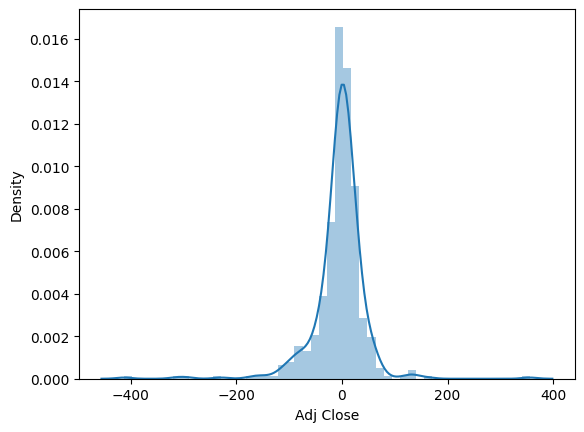

In [32]:
sns.distplot((y_test-y_pred),bins=50)

In [33]:
print(y_test.shape)
print(y_pred.shape)

(503,)
(503,)


In [34]:
lm_fit = lm.fit(X_train, y_train)
lm_scores = cross_val_score(lm_fit, X_train, y_train, cv = 5)

print("Mean cross validation score: {}".format(np.mean(lm_scores)))
print("Score without cv: {}".format(lm_fit.score(X_train, y_train)))

Mean cross validation score: 0.9998945905244245
Score without cv: 0.999908520002656


# **Accuracy and Loss Function Values of the Model**

In [35]:
print('Mean_Absolute_Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean_Squared_Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root_Mean_Squared_Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean_Absolute_Error(MAE): 28.26542154620928
Mean_Squared_Error(MSE): 2482.3811965426908
Root_Mean_Squared_Error(RMSE): 49.82350044449598


In [36]:
print("Accuracy score: {:.7f}".format(lm.score(X_test, y_test)))

Accuracy score: 0.9998467


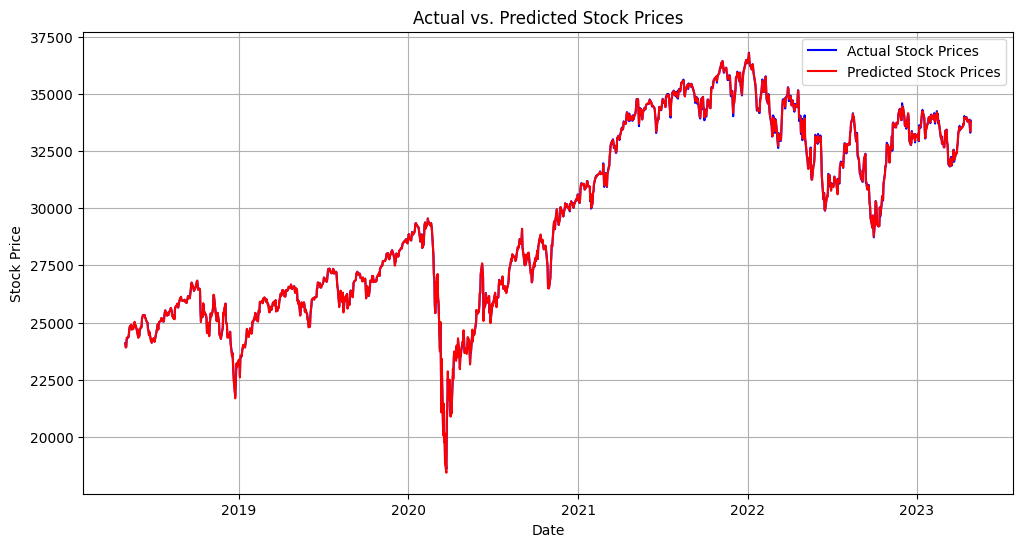

In [38]:
import matplotlib.pyplot as plt

# Plotting the actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(dataset['Date'], dataset['Adj Close'], label='Actual Stock Prices', color='blue')

# Plotting the predicted stock prices for the entire dataset
plt.plot(dataset['Date'], lm.predict(X), label='Predicted Stock Prices', color='red')

plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()